In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("titles_filtrado.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5850 non-null   int64  
 1   id                    5850 non-null   object 
 2   title                 5849 non-null   object 
 3   type                  5850 non-null   object 
 4   description           5832 non-null   object 
 5   release_year          5850 non-null   int64  
 6   age_certification     3231 non-null   object 
 7   runtime               5850 non-null   int64  
 8   genres                5850 non-null   object 
 9   production_countries  5850 non-null   object 
 10  seasons               2106 non-null   float64
 11  imdb_id               5447 non-null   object 
 12  imdb_score            5850 non-null   float64
 13  imdb_votes            5352 non-null   float64
 14  tmdb_popularity       5759 non-null   float64
 15  tmdb_score           

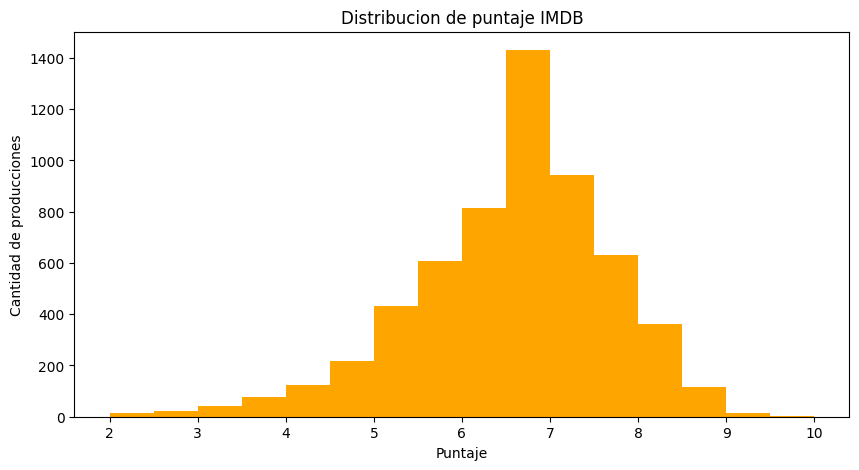

In [13]:
plt.figure(figsize=(10, 5))
plt.title('Distribucion de puntaje IMDB')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de producciones')

plt.hist(df['imdb_score'], bins=np.arange(2,10.1,.5), color='orange')

plt.show()

Mediante este grafico, se puede ver que la media de la puntuacion se encuentra entre 6 y 8 puntos, si se toma como parametro la puntuacion IMDB, se puede decir que el contenido presentado por la plataforma suele ser de buena calidad en general.

C:\Users\ezesp\AppData\Local\Temp\ipykernel_18392\2671258817.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  countries = countries.str.replace("[","")
C:\Users\ezesp\AppData\Local\Temp\ipykernel_18392\2671258817.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  countries = countries.str.replace("]","")


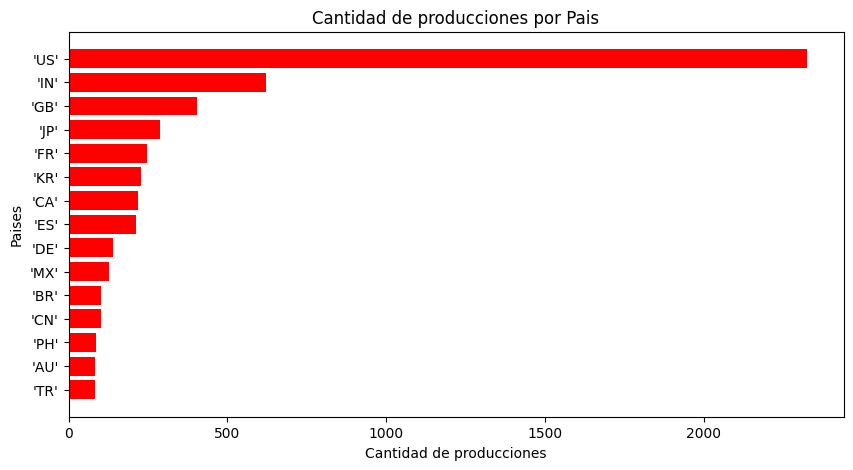

In [40]:
#Limpieza de columna countries
from turtle import width


countries = df['production_countries']
countries = countries.astype("string")
countries = countries.str.replace("[","")
countries = countries.str.replace(" ","")
countries = countries.str.replace("]","")
countries = countries.str.split(",",expand=True)

#Agrego todos los generos en una sola columna, en el df original, peliculas con mas de un pais en esta columna
countries_sumados = pd.Series("string")
for col in countries:
    countries_sumados = pd.concat([countries_sumados,countries[col]], ignore_index=True)
    
#Quito los varoles nulos y datos incongruentes
countries_sumados = countries_sumados.astype("string")
countries_sumados.sort_values()
countries_sumados = countries_sumados[countries_sumados != "NA"]
countries_sumados = countries_sumados[countries_sumados != "string"]
countries_sumados = countries_sumados[countries_sumados != ""]

#Creo una serie con las sumas ya hechas y, como son muchos los paises con producciones, solo presento los primeros 15

sumatoria = countries_sumados.value_counts().head(15)


#Grafico los paises

plt.figure(figsize=(10, 5))

plt.title('Cantidad de producciones por Pais')
plt.xlabel('Cantidad de producciones')
plt.ylabel('Paises')

sumatoria.sort_values(inplace=True)

plt.barh(y= sumatoria.index, width=sumatoria, color='red',)

plt.show()



En este grafico se puede ver una clara ponderancia de Estados Unidos en la creacion de contenido, seguido por India, Gran Bretaña y Japon.

C:\Users\ezesp\AppData\Local\Temp\ipykernel_18392\1766765568.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  generos = generos.str.replace("[","")
C:\Users\ezesp\AppData\Local\Temp\ipykernel_18392\1766765568.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  generos = generos.str.replace("]","")


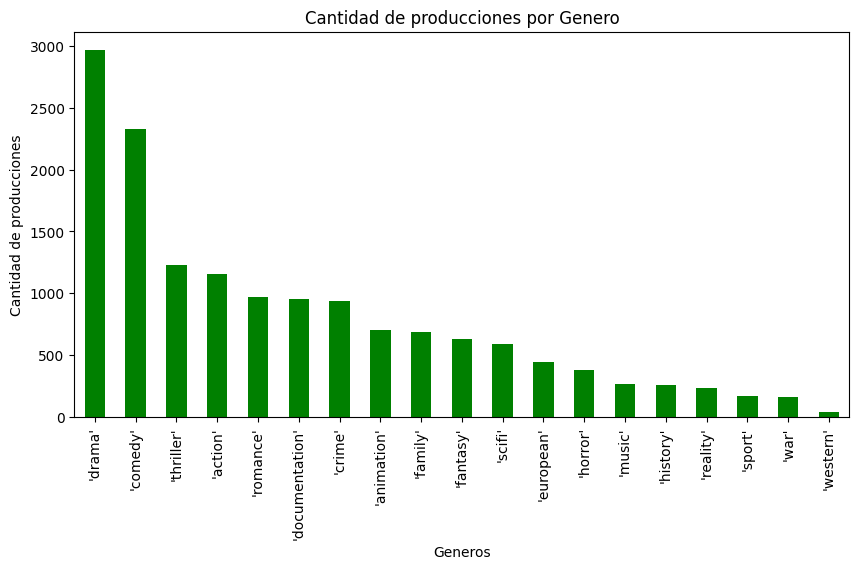

In [59]:
#Limpieza de columna generos
from turtle import color


generos = df['genres']
generos = generos.astype("string")
generos = generos.str.replace("[","")
generos = generos.str.replace(" ","")
generos = generos.str.replace("]","")
generos = generos.str.split(",",expand=True)
#Agrego todos los generos en una sola columna, en el df original, peliculas con mas de un genero en esta columna
generos_sumados = pd.Series("string")
for col in generos:
    generos_sumados = pd.concat([generos_sumados,generos[col]], ignore_index=True)
#Quito los varoles nulos y datos incongruentes
generos_sumados = generos_sumados.astype("string")
generos_sumados.sort_values()
generos_sumados = generos_sumados[generos_sumados != "<NA>"]
generos_sumados = generos_sumados[generos_sumados != "string"]
generos_sumados = generos_sumados[generos_sumados != ""]

#print(generos_sumados.value_counts())


#Grafico los generos

plt.figure(figsize=(10, 5))

plt.title('Cantidad de producciones por Genero')
plt.ylabel('Cantidad de producciones')
plt.xlabel('Generos')

generos_sumados.value_counts().sort_values(ascending=False).plot.bar(color= 'green')

plt.show()




Dentro de la distribucion de generos, hay una clara ponderancia de los generos de Drama y Comedia dentro de las tematicas elegidas para los contenidos.